# Motion Capture Data Analysis - NM18

## Libraries
Installing and importing libraries for data processing, sound analysis and visualization. 

In [1]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install librosa #Sound analysis

You are using pip version 19.0.1, however version 20.2b1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
!{sys.executable} -m pip install chart_studio  #Librosa plots

You are using pip version 19.0.1, however version 20.2b1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [4]:
!{sys.executable} -m pip install numba

You are using pip version 19.0.1, however version 20.2b1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [5]:
import numba

In [6]:
import pandas as pd
import numpy as np
import librosa
import librosa.display
import matplotlib
import random
%matplotlib inline
import csv
import glob
import os
import matplotlib.pyplot as plt
import math
import sys
import pylab
import numpy.linalg
import chart_studio

%load_ext rpy2.ipython

#r packages
from rpy2.robjects import r
from rpy2.robjects.packages import importr
from rpy2.robjects import FloatVector
stats = importr('stats')
base = importr('base')

from scipy import stats
import seaborn
from IPython.display import display, Markdown


The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


## Reading Motion Capture Data into Pandas Dataframes

In [118]:
#Reading QTOM generated tsv files (one for each group of participants) from local drive

nm18raw = {}

path = r'/Users/vesanche/Desktop/NM18_ex/' # use your path for the folder containing mocap files
nm_files = sorted(glob.glob(os.path.join(path, "*.tsv")))

i=1

for filename in nm_files:
    nm18raw[i] = pd.read_csv(filename, sep='\t', encoding='utf-8', skiprows=10, low_memory=False, na_values='0')
    nm18raw[i].drop(nm18raw[i].columns[len(nm18raw[i].columns)-1], axis=1, inplace=True)
    nm18raw[i].drop(nm18raw[i].iloc[:, 0:6],  axis = 1, inplace = True)
    i = i+1



In [121]:
#Example: Group1. All participants
nm18raw[1]


,A1 X,A1 Y,A1 Z,A2 X,A2 Y,A2 Z,A3 X,A3 Y,A3 Z,A4 X,...,A10 Z,A11 X,A11 Y,A11 Z,A12 X,A12 Y,A12 Z,A13 X,A13 Y,A13 Z
0,-1598.944,850.540,1761.275,-548.114,950.967,1583.669,551.470,907.096,1693.981,1610.361,...,NaN,-516.202,-909.647,1743.650,474.026,-983.933,1856.708,1542.847,-946.023,1715.376
1,-1599.205,849.771,1760.894,-548.160,950.929,1583.644,551.457,907.051,1693.974,1610.357,...,1770.210,-516.182,-909.627,1743.656,474.003,-983.923,1856.714,1542.808,-945.968,1715.358
2,-1599.190,849.730,1760.888,-548.212,950.881,1583.682,551.452,907.028,1693.997,1610.353,...,1770.169,-516.092,-909.589,1743.607,473.981,-983.984,1856.753,1542.807,-945.965,1715.364
3,-1599.192,849.705,1760.876,-548.264,950.866,1583.688,551.433,907.009,1693.987,1610.351,...,1770.207,-516.178,-909.655,1743.637,473.968,-984.028,1856.740,1542.787,-945.936,1715.352
4,-1599.196,849.670,1760.893,-548.322,950.815,1583.659,551.433,906.956,1693.986,1610.352,...,1770.215,-516.106,-909.622,1743.657,473.947,-984.070,1856.726,1542.801,-945.914,1715.345
5,-1599.113,849.550,1760.705,-548.858,950.566,1583.215,551.333,907.046,1694.172,1610.324,...,1770.177,-516.152,-909.686,1743.621,473.944,-984.100,1856.709,1542.799,-945.907,1715.359
6,-1599.120,849.520,1760.702,-548.821,950.781,1583.448,551.328,907.029,1694.163,1610.094,...,1770.200,-516.033,-909.712,1743.628,474.101,-984.157,1856.594,1542.801,-945.904,1715.390
7,-1599.108,849.492,1760.698,-548.882,950.754,1583.474,551.400,906.812,1694.049,1609.953,...,1770.167,-516.190,-909.763,1743.561,474.025,-984.539,1856.976,1542.834,-945.908,1715.402
8,-1599.105,849.468,1760.689,-548.435,950.643,1583.660,551.426,906.832,1693.971,1610.356,...,1770.146,-516.187,-909.656,1743.656,474.093,-984.212,1856.847,1542.815,-945.900,1715.407
9,-1599.018,849.999,1761.078,-548.471,950.605,1583.667,551.429,906.776,1693.968,1610.369,...,1770.144,-516.281,-909.687,1743.628,474.073,-984.277,1856.846,1542.816,-945.900,1715.407


## Extracting individuals from groups and nesting in dictionaries

In [122]:
nm18 = {}
Fs = 200 #sampling frequency of the Mocap system (fps)    
num_groups = len(nm18raw)
    

for g_id in range(1,num_groups+1):
    nm18[g_id] = {}
    j = 0
    k = 0
    for i in range (3,len(nm18raw[g_id].columns)+3,3):
        j = j+1
        nm18[g_id][j] = nm18raw[g_id].iloc[:,k:i:1]
        nm18[g_id][j].columns = ['X', 'Y', 'Z']
        time = np.linspace(0, len(nm18raw[g_id])/Fs, len(nm18raw[g_id]))
        nm18[g_id][j].insert(0, 'Time (s)', time)
        k = k+3

In [124]:
nm18[1][4] #data from group 1, participant 1 with time column

,Time (s),X,Y,Z
0,0.000000,1610.361,940.948,1650.696
1,0.005000,1610.357,940.907,1650.707
2,0.010000,1610.353,940.903,1650.721
3,0.015000,1610.351,940.878,1650.708
4,0.020000,1610.352,940.852,1650.717
5,0.025000,1610.324,940.864,1650.713
6,0.030000,1610.094,940.917,1650.641
7,0.035000,1609.953,940.638,1650.542
8,0.040000,1610.356,940.927,1651.103
9,0.045000,1610.369,940.931,1651.117


## Calculating variables for analysis (displacement, velocity, quantity of motion)

### Calculating displacement (change of position)

In [62]:
def displacement(position):

    displacement = (
        np.roll(position, -1, axis=0)
        - position)
    displacement = displacement.drop(displacement.index[len(displacement)-1])
    
    displacement.index =  position['Time (s)'][1:]
    
    return displacement


In [63]:
displacements = {}    

for groups in range(1,num_groups+1):
    displacements[groups] = {}
    
    for i in range(1,len(nm18[groups]) + 1):
        displacements[groups][i] = displacement(nm18[groups][i])
        displacements[groups][i]['timestep (s)'] = displacements[groups][i]['Time (s)']
        displacements[groups][i] = displacements[groups][i].drop(['Time (s)'], axis=1)
        

In [66]:
displacements[1][1] #displacement for group 1, participant 1

,X,Y,Z,timestep (s)
Time (s),,,,
0.005000,-0.046,-0.038,-0.025,0.005
0.010000,-0.052,-0.048,0.038,0.005
0.015000,-0.052,-0.015,0.006,0.005
0.020000,-0.058,-0.051,-0.029,0.005
0.025000,-0.536,-0.249,-0.444,0.005
0.030000,0.037,0.215,0.233,0.005
0.035000,-0.061,-0.027,0.026,0.005
0.040000,0.447,-0.111,0.186,0.005
0.045000,-0.036,-0.038,0.007,0.005


### Plotting displacement


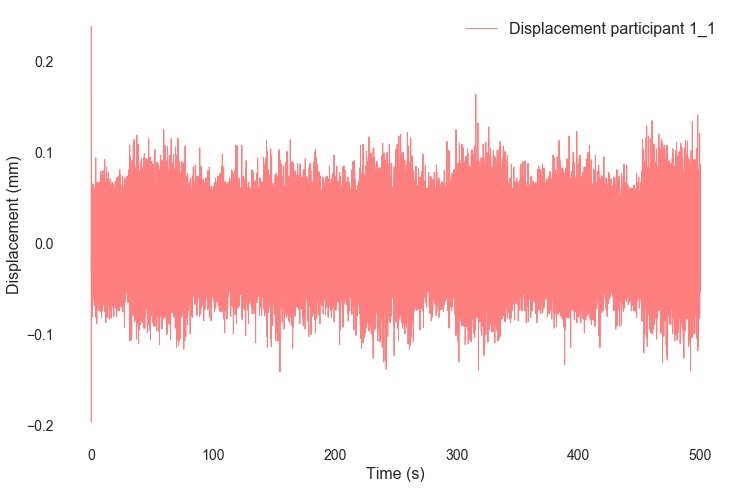

In [148]:
fig5, ax5 = plt.subplots(1)
fig5.set_figheight(8)
fig5.set_figwidth(12)
ax5.set_facecolor("white")
ax5.plot(displacements[1][1]['X'], lw=1, label='Displacement participant 1_1', color='red', alpha=0.5) #Displacement on x axis

plt.tick_params(axis='both', which='major', labelsize=14)
ax5.legend(loc='upper right', fontsize=16)
plt.xlabel('Time (s)', fontsize=16);
plt.ylabel('Displacement (mm)', fontsize=16);

### Calculating norm of displacement

In [72]:
def disp_norm(displacement):
  
       
    dispnorm = np.sqrt(
         displacement.X ** 2 +
         displacement.Y ** 2 +
         displacement.Z ** 2
    )
    
    return pd.DataFrame({
        'Norm of Displacement': dispnorm,
    })

In [74]:
disp_norms = {}    

for groups in range(1,num_groups+1):
    disp_norms[groups] = {}
    
    for i in range(1,len(nm18[groups])+1):
        disp_norms[groups][i] = disp_norm(displacements[groups][i])

In [75]:
disp_norms[1][4]

,Norm of Displacement
Time (s),
0.005000,0.064692
0.010000,0.080324
0.015000,0.054452
0.020000,0.082498
0.025000,0.739211
0.030000,0.319191
0.035000,0.071596
0.040000,0.496715
0.045000,0.052811


### Distance travelled
Cummulative distance travelled

In [96]:
#Concatenating norm of displacement for all participants in each group
disp_norms_group = {}
for group_id in range (1,num_groups+1):
    disp_norms_group[group_id] = pd.concat(disp_norms[group_id],1)
   
    

In [97]:
disp_norms_group[1]

,1,2,3,4,5,6,7,8,9,10,11,12,13,14
,Norm of Displacement,Norm of Displacement,Norm of Displacement,Norm of Displacement,Norm of Displacement,Norm of Displacement,Norm of Displacement,Norm of Displacement,Norm of Displacement,Norm of Displacement,Norm of Displacement,Norm of Displacement,Norm of Displacement,Norm of Displacement
Time (s),,,,,,,,,,,,,,
0.005000,0.066851,NaN,0.897019,0.064692,0.047360,0.042638,0.038588,0.029698,0.162638,0.046400,0.099690,NaN,0.028914,0.025788
0.010000,0.004583,0.000000,0.044068,0.080324,0.032909,0.015100,0.039230,0.030773,0.144986,0.026739,0.056736,0.069584,0.109293,0.075670
0.015000,0.000000,0.000000,0.027803,0.054452,0.028671,0.028249,0.024698,0.016763,0.050289,0.027203,0.075193,0.098041,0.112481,0.047686
0.020000,0.025040,0.015811,0.039115,0.082498,0.053009,0.027532,0.035749,0.018055,0.018466,0.022023,0.101533,0.069642,0.081688,0.049000
0.025000,0.362968,0.015811,0.237977,0.739211,0.229556,0.030725,0.317295,0.161434,0.062825,0.054351,0.106287,0.053038,0.086649,0.034612
0.030000,0.037376,0.000000,0.030952,0.319191,0.019875,0.246765,0.023537,0.146134,0.093134,0.160034,0.093819,0.061205,0.122008,0.202788
0.035000,0.022383,0.018028,0.030725,0.071596,0.255478,0.327907,0.057697,0.454440,0.206896,0.166114,0.161468,0.033302,0.178154,0.545549
0.040000,0.026287,0.017292,0.025807,0.496715,0.084617,0.748766,0.232641,0.144631,0.594261,0.349521,0.272927,0.043290,0.143119,0.358042


Text(0.5, 1.0, 'Distance travelled for all participants, Group 1')

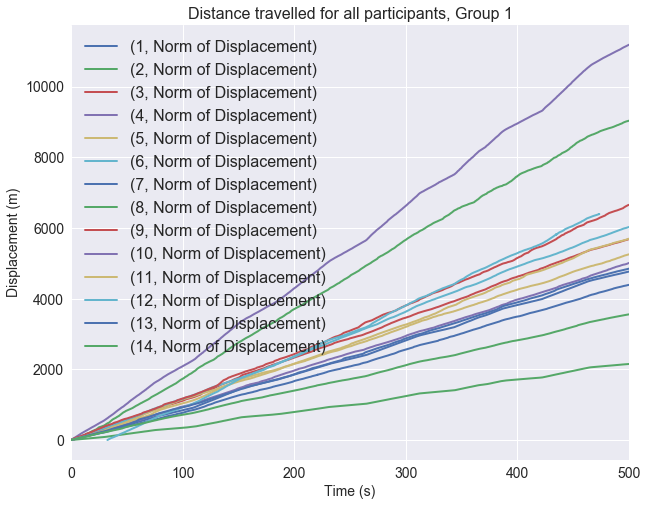

In [99]:
disp_norms_group[1].cumsum().plot(figsize=(10,8), linewidth=2, fontsize=14) #Indicate group number to plot
plt.xlabel('Time (s)', fontsize=14);
plt.ylabel('Displacement (mm)', fontsize=14);
plt.legend(loc='upper left', fontsize=16)
plt.title('Distance travelled for all participants, Group 1', fontsize=16)

### Plotting the planar displacement

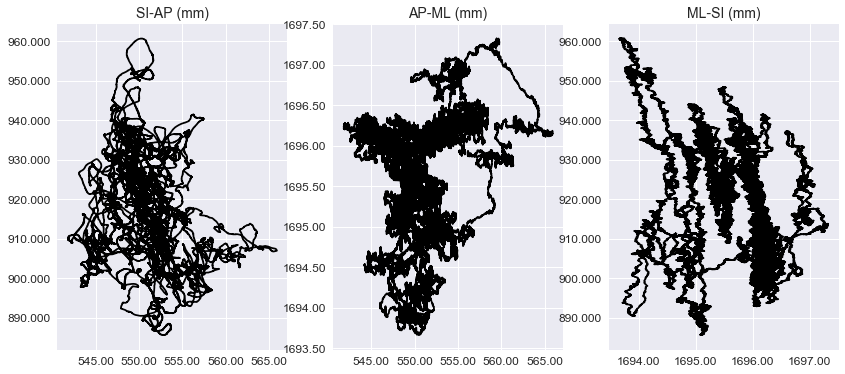

In [127]:
from matplotlib.ticker import FormatStrFormatter

fig = plt.figure(figsize=(14,6))
aa = plt.subplot(1, 3, 1)
plt.plot(nm18[1][3]['X'], nm18[1][3]['Y'], color='k') #XY plane participant 3, group 1
plt.title('X-Y (mm)', fontsize=14)
aa.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
aa.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


ab = plt.subplot(1, 3, 2)
plt.plot(nm18[1][3]['X'], nm18[1][3]['Z'], color='k') #XZ plane participant 3, group 1
plt.title('X-Z (mm)', fontsize=14)
ab.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ab.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


ac = plt.subplot(1, 3, 3)
plt.plot(nm18[1][3]['Z'], nm18[1][3]['Y'], color='k') #ZY plane participant 3, group 1
plt.title('Z-Y (mm)', fontsize=14)
ac.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ac.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


#fig.savefig("paths.pdf", bbox_inches='tight')

### Calculating velocity in X, Y, and Z directions
Defining and running functions to calculate velocity

In [135]:
def x_vel(displacement):
    
    #displacement = displacement.drop(displacement.index)
    
    vel = np.sqrt(
         displacement.X ** 2) /  displacement['timestep (s)']
    
    return pd.DataFrame({
        'Vel X': vel,
    })

In [136]:
def y_vel(displacement):
   
    #displacement = displacement.drop(displacement.index)
    
    vel = np.sqrt(
         displacement.Y ** 2) /  displacement['timestep (s)']
    
    return pd.DataFrame({
        'Vel Y': vel,
    })

In [137]:
def z_vel(displacement):
    
    #displacement = displacement.drop(displacement.index)
    
    vel = np.sqrt(
         displacement.Z ** 2) /  displacement['timestep (s)']
    
    return pd.DataFrame({
        'Vel Z': vel,
    })

In [139]:

velx = {} #anterior-posterior (AP)
vely = {} #mediolatera (ML)
velz = {} #vertical (SI)

for groups in range(1,num_groups+1):
    velx[groups] = {}
    vely[groups] = {}
    velz[groups] = {}
    
    for i in range(1,len(nm18[groups])+1):
        velx[groups][i] = x_vel(displacements[groups][i])
        vely[groups][i] = y_vel(displacements[groups][i])
        velz[groups][i] = z_vel(displacements[groups][i])

In [140]:
velx[1][2] #velocity in the AP direction for participant 1_2

,Vel X
Time (s),
0.005000,NaN
0.010000,0.000000
0.015000,0.000000
0.020000,0.599994
0.025000,0.599994
0.030000,0.000000
0.035000,1.999980
0.040000,2.599974
0.045000,41.999580


### Calculating norm of velocity (QoM)

In [141]:
def velocity_norm(displacement):
    
    #displacement = displacement.drop(displacement.index)
    
    vel = np.sqrt(
         displacement.X ** 2 +
         displacement.Y ** 2 +
         displacement.Z ** 2
    ) /  displacement['timestep (s)']
    
    return pd.DataFrame({
        'Velocity': vel,
    })
       

In [142]:
velocities = {}    

for groups in range(1,num_groups+1):
    velocities[groups] = {}
    
    for i in range(1,len(nm18[groups])+1):
        velocities[groups][i] = velocity_norm(displacements[groups][i])

In [143]:
velocities[1][2] #displaying velocity for group 1, participant 2

,Velocity
Time (s),
0.005000,NaN
0.010000,0.000000
0.015000,0.000000
0.020000,3.162246
0.025000,3.162246
0.030000,0.000000
0.035000,3.605515
0.040000,3.458289
0.045000,89.353681


In [144]:
#Concatenating velocities for all participants in each group
vels_group = {}
velsx_group = {}
velsy_group = {}
velsz_group = {}

for group_id in range(1,num_groups+1):
    vels_group[group_id] = pd.concat(velocities[group_id],1)
    velsx_group[group_id] = pd.concat(velx[group_id],1)
    velsy_group[group_id] = pd.concat(vely[group_id],1)
    velsz_group[group_id] = pd.concat(velz[group_id],1)
    
    ID_group = list(range(1,(len(vels_group[group_id].columns)+1)))
    
    vels_group[group_id].columns = ID_group
    velsx_group[group_id].columns = ID_group
    velsy_group[group_id].columns = ID_group
    velsz_group[group_id].columns = ID_group

In [184]:
vels_group[1]

,1,2,3,4,5,6,7,8,9,10,11,12
Time (s),,,,,,,,,,,,
0.005000,13.369982,NaN,179.401996,12.938186,9.471969,8.527517,7.717435,5.939638,32.527202,9.279993,19.937704,NaN
0.010000,0.916506,0.000000,8.813538,16.064708,6.581727,3.019904,7.845940,6.154611,28.996951,5.347843,11.347133,13.916757
0.015000,0.000000,0.000000,5.560520,10.890254,5.734051,5.649722,4.939586,3.352577,10.057732,5.440534,15.038467,19.607965
0.020000,5.007944,3.162246,7.822965,16.499532,10.601781,5.506305,7.149754,3.611058,3.693200,4.404499,20.306446,13.928249
0.025000,72.592938,3.162246,47.594902,147.840735,45.910760,6.144855,63.458329,32.286517,12.564905,10.870034,21.257257,10.607438
0.030000,7.475218,0.000000,6.190253,63.837595,3.974882,49.352521,4.707394,29.226408,18.626676,32.006554,18.763607,12.240793
0.035000,4.476561,3.605515,6.144855,14.319075,51.095086,65.580744,11.539382,90.887154,41.378808,33.222551,32.293330,6.660264
0.040000,5.257323,3.458289,5.161344,99.342049,16.923187,149.751766,46.527806,28.925824,118.850989,69.903521,54.584800,8.657858
0.045000,5.649722,89.353681,132.791895,10.562091,11.231985,3.903805,170.252225,44.414418,49.501424,6.076122,11.654925,10.303294


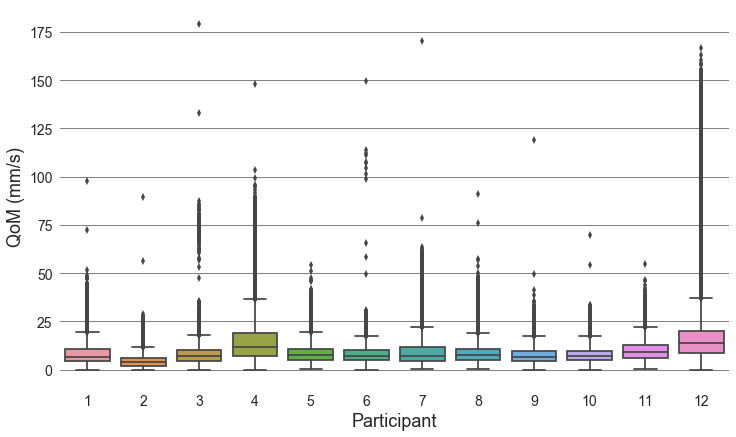

In [147]:
#Box plot of QoM

figbox, axbox = plt.subplots(figsize=(12,7))
qombox = seaborn.boxplot(ax=axbox, data=vels_group[1], width=0.8)
axbox.set_facecolor("white")
axbox.yaxis.grid(color='gray')
qombox.set_xlabel("Participant",fontsize=18)
qombox.set_ylabel("QoM (mm/s)",fontsize=18)
qombox.tick_params(labelsize=14)

### Smoothing velocity
Calculating the envelope of the velocity using a rolling average

In [159]:
#Smoothing the velocity profile for all participants (envelope)
velenv = {}    
velenvx = {}
velenvy = {}
velenvz = {}

for groups in range(1,num_groups+1):
    velenv[groups] = {}
    velenvx[groups] = {}
    velenvy[groups] = {}
    velenvz[groups] = {}
    
    
    for i in range(1,len(nm18[groups])+1):
        velenv[groups][i] = vels_group[groups][i].rolling(200,center=True,win_type='boxcar',min_periods=1).mean()
        
        velenvx[groups][i] = velsx_group[groups][i].rolling(200,center=True,win_type='boxcar',min_periods=1).mean()
        velenvy[groups][i] = velsy_group[groups][i].rolling(200,center=True,win_type='boxcar',min_periods=1).mean()
        velenvz[groups][i] = velsz_group[groups][i].rolling(200,center=True,win_type='boxcar',min_periods=1).mean()

In [160]:
#Concatenating smoothed velocity for all participants in each group
vel_env_group = {}
vel_envx_group = {}
vel_envy_group = {}
vel_envz_group = {}

for group_id in range(1,num_groups+1):
    vel_env_group[group_id] = pd.concat(velenv[group_id],1)
    
    vel_envx_group[group_id] = pd.concat(velenvx[group_id],1)
    vel_envy_group[group_id] = pd.concat(velenvy[group_id],1)
    vel_envz_group[group_id] = pd.concat(velenvz[group_id],1)

In [162]:
vel_envx_group[1] #smoothed velocities group 1

,1,2,3,4,5,6,7,8,9,10,11,12
Time (s),,,,,,,,,,,,
0.005000,5.331947,1.862608,3.019970,6.635934,3.587964,4.769952,3.999960,5.807942,5.077949,4.297957,7.153928,8.187797
0.010000,5.306878,1.845982,3.065316,6.611815,3.574222,4.748467,3.984119,5.762319,5.118761,4.287086,7.130622,8.223918
0.015000,5.282300,1.853447,3.094087,6.550915,3.556827,4.705835,3.956823,5.774452,5.099949,4.270546,7.111694,8.231601
0.020000,5.297034,1.872530,3.102882,6.572750,3.530062,4.712574,3.943650,5.720331,5.145580,4.238793,7.085366,8.270506
0.025000,5.323024,1.891243,3.098046,6.542242,3.517273,4.688415,3.923038,5.688405,5.101872,4.236496,7.067237,8.300888
0.030000,5.283757,1.886520,3.131397,6.487554,3.500917,4.718048,3.918056,5.641848,5.142806,4.236148,7.038025,8.315301
0.035000,5.298060,1.868553,3.160346,6.503709,3.482984,4.673538,3.894301,5.673528,5.115043,4.228260,7.024458,8.238013
0.040000,5.302751,1.852812,3.186884,6.482178,3.497161,4.650421,3.874728,5.633589,5.119575,4.194351,6.984977,8.224446
0.045000,5.274021,1.835496,3.179598,6.477713,3.470336,4.631435,3.857369,5.599944,5.094394,4.188847,6.999930,8.224217


Text(0.5, 1.0, 'Velocity (participant 1_10)')

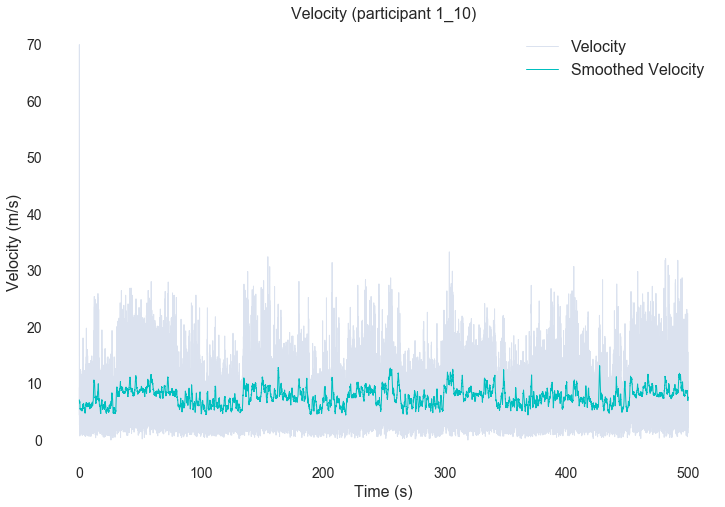

In [163]:
# Raw and smooth velocity plot for one participant

fig, ax = plt.subplots(1)
fig.set_figheight(8)
fig.set_figwidth(12)
ax.set_facecolor("white")
ax.plot(vels_group[1][10], lw=1, label='Velocity', alpha=0.2)
ax.plot(velenv[1][10], lw=1, label='Smoothed Velocity', color='c')
plt.tick_params(axis='both', which='major', labelsize=14)
ax.legend(loc='upper right', fontsize=16)
plt.xlabel('Time (s)', fontsize=16);
plt.ylabel('Velocity (m/s)', fontsize=16);
plt.title('Velocity (participant 1_10)', fontsize=16)

Text(0.5, 1.0, 'Velocities from all participants in Group 1')

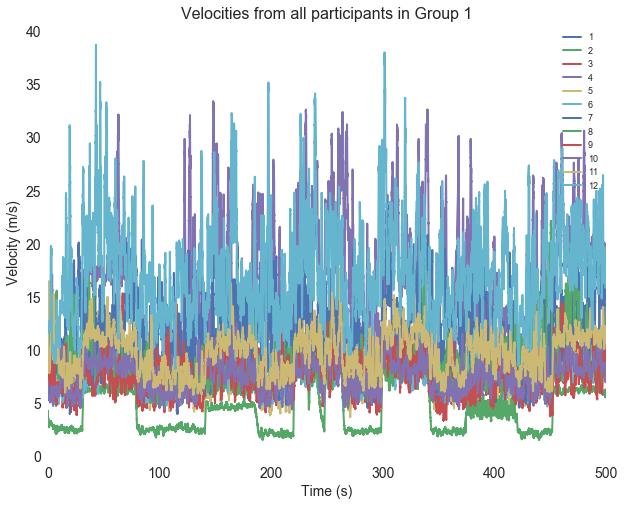

In [164]:
#Plotting all smoothed velocities for one group
ax1 = vel_env_group[1].plot(figsize=(10,8), linewidth=2, fontsize=14)
ax1.set_facecolor("white")
plt.xlabel('Time (s)', fontsize=14);
plt.ylabel('Velocity (m/s)', fontsize=14);
plt.legend(loc='upper right', fontsize=9)
plt.title('Velocities from all participants in Group 1', fontsize=16)

### Mean of Norm of the Velocity (mean QoM)

In [165]:
#Mean of cleaned velocities

for groups in range(1,num_groups+1):
    
    for i in range(1,len(nm18[groups])+1):
        velocities[groups][i].loc['mean'] = velocities[groups][i].mean()

## Segmenting data by conditions and stimuli
Using the order of presentation of stimuli for each group to segment full trials into conditions (music-silence), and stimuli

In [170]:
#Stimuli presentation order. Group A was a pilot group and was discarded from further analysis
nm18songorder = pd.read_csv('/Users/vesanche/Desktop/NM18_ex/nm18songorder.csv') #read the stimuli order file
nm18songorder.columns = ['Group','1', '2', '3','4', '5', '6']
nm18songorder.set_index('Group',inplace=True, drop=True) #Displaying song order table
nm18songorder

,1,2,3,4,5,6
Group,,,,,,
A,1,2,3,4,5,6
B,6,5,1,2,4,3
C,5,3,6,1,4,2
D,6,2,4,3,5,1
E,2,1,6,5,3,4
F,5,3,6,2,1,4
G,4,3,1,6,2,5
H,4,2,5,1,6,3
I,2,1,6,3,5,4


### Segmenting group data by songs based on the order of stimuli presentation

In [171]:
def segments(songorder,data):
    #works for mocap data at 200hz, song duration used in NM18
    #Silence 1 - 30s
    #Silence 2, 3, 4, 5, 6 - 30s
    #1 - Andre Bratten - 49s
    #2 - Metronome - 48s
    #3 - Neelix1 - 47s
    #4 - Neelix2 - 48s
    #5 - Pysh - 48s
    #6 - Rhythm - 48s
    #Silence 7 - 30s + extra 2s to round up to 500s
    #Total duration of recording 500s
   
    
    start = {}
    segments = {}
    segments[1] = data[0:30]
    start[1] = 0
    start[2] = 30
    song = 0
    
    while song <= len(songorder.columns)-1:
        for inicio in range (2,13,2):
            if songorder.iloc[0][song] == 1:
                        segments[inicio]=data[start[inicio]:start[inicio]+49] #song1 49s
                        segments[inicio+1]=data[start[inicio]+49:start[inicio]+49+30] #30s silence
                        start[inicio+2] = start[inicio]+49+30
                        song = song+1  
            elif songorder.iloc[0][song] == 2:
                        segments[inicio]=data[start[inicio]:start[inicio]+48] #song2 48s
                        segments[inicio+1]=data[start[inicio]+48:start[inicio]+48+30] #30s silence
                        start[inicio+2] = start[inicio]+48+30
                        song = song+1
            elif songorder.iloc[0][song] == 3:
                        segments[inicio]=data[start[inicio]:start[inicio]+47] #song3 47s
                        segments[inicio+1]=data[start[inicio]+47:start[inicio]+47+30] #30s silence
                        start[inicio+2] = start[inicio]+47+30
                        song = song+1
            elif songorder.iloc[0][song] == 4:
                        segments[inicio]=data[start[inicio]:start[inicio]+48] #song4 48s
                        segments[inicio+1]=data[start[inicio]+48:start[inicio]+48+30] #30s silence
                        start[inicio+2] = start[inicio]+48+30
                        song = song+1
            elif songorder.iloc[0][song] == 5:
                        segments[inicio]=data[start[inicio]:start[inicio]+48] #song5 48s
                        segments[inicio+1]=data[start[inicio]+48:start[inicio]+48+30] #30s silence
                        start[inicio+2] = start[inicio]+48+30
                        song = song+1
            elif songorder.iloc[0][song] == 6:
                        segments[inicio]=data[start[inicio]:start[inicio]+48] #song6 48s
                        segments[inicio+1]=data[start[inicio]+48:start[inicio]+48+30] #silence
                        start[inicio+2] = start[inicio]+48+30
                        song = song+1
    return segments

### Segmenting raw and smoothed Velocity (QoM)

In [173]:
QoM_segmented = {}
QoMX_segmented = {}
QoMY_segmented = {}
QoMZ_segmented = {}

for group_id in range(1,num_groups+1):
    QoM_segmented[group_id] = segments(nm18songorder[group_id-1:group_id],vels_group[group_id])
    QoMX_segmented[group_id] = segments(nm18songorder[group_id-1:group_id],velsx_group[group_id])
    QoMY_segmented[group_id] = segments(nm18songorder[group_id-1:group_id],velsy_group[group_id])
    QoMZ_segmented[group_id] = segments(nm18songorder[group_id-1:group_id],velsz_group[group_id])
    
QoM_smooth_segmented = {}
QoMX_smooth_segmented = {}
QoMY_smooth_segmented = {}
QoMZ_smooth_segmented = {}

for group_id in range(1,num_groups+1):
    QoM_smooth_segmented[group_id] = segments(nm18songorder[group_id-1:group_id],vel_env_group[group_id])
    QoMX_smooth_segmented[group_id] = segments(nm18songorder[group_id-1:group_id],vel_envx_group[group_id])
    QoMY_smooth_segmented[group_id] = segments(nm18songorder[group_id-1:group_id],vel_envy_group[group_id])
    QoMZ_smooth_segmented[group_id] = segments(nm18songorder[group_id-1:group_id],vel_envz_group[group_id])

In [183]:
QoM_segmented[1][2] #Displaying QoM data for group 1, segment 2

,1,2,3,4,5,6,7,8,9,10,11,12
Time (s),,,,,,,,,,,,
30.000300,13.696578,6.979902,4.890759,2.727609,29.500213,8.376073,3.867777,10.875552,4.955755,2.135394,7.238712,8.499327
30.005300,5.646181,1.624791,5.635545,4.565039,22.833081,8.590607,9.921594,14.434536,3.498536,3.768251,6.988492,14.463603
30.010300,4.467617,2.675791,4.737040,5.039791,6.599934,6.802873,8.802184,14.821458,3.805221,5.466205,5.747986,7.594659
30.015300,0.663318,1.708784,3.376355,8.915066,10.577228,4.171289,3.440896,14.417900,2.756782,1.886777,8.332983,8.912823
30.020300,9.808062,1.624791,4.331238,7.525880,9.143212,8.722298,6.796990,12.270167,5.219143,6.624132,5.531671,6.890504
30.025300,0.000000,4.088969,3.255732,3.206212,11.366504,2.835461,3.059381,20.992170,4.947677,5.772290,6.875977,2.898246
30.030300,18.270012,5.744505,1.148901,4.669000,6.905002,2.449465,5.039791,10.840556,4.774887,6.849749,5.340359,7.668039
30.035300,13.812899,5.744505,2.630563,0.399996,14.244857,4.280144,3.255732,15.323032,4.358855,6.327654,5.936269,21.056855
30.040300,1.341627,1.536214,4.812436,6.356036,5.635545,3.852234,5.888914,11.627437,5.188397,2.280328,2.630563,5.723578


### Grouping data into Music and Silence conditions

In [185]:
#Odd segments are silence, even segments are music
QoM_segmented_mus = {} #creating empty dictionaries for music and silence
QoMX_segmented_mus = {}
QoMY_segmented_mus = {}
QoMZ_segmented_mus = {}

QoM_segmented_sil = {}
QoMX_segmented_sil = {}
QoMY_segmented_sil = {}
QoMZ_segmented_sil = {}

QoM_smooth_segmented_mus = {}
QoMX_smooth_segmented_mus = {}
QoMY_smooth_segmented_mus = {}
QoMZ_smooth_segmented_mus = {}

QoM_smooth_segmented_sil = {}
QoMX_smooth_segmented_sil = {}
QoMY_smooth_segmented_sil = {}
QoMZ_smooth_segmented_sil = {}


for group_id in range(1,num_groups+1):
  QoM_segmented_mus[group_id] = {} #creating empty dictionary for each group for both music and silence conditions
  QoMX_segmented_mus[group_id] = {}
  QoMY_segmented_mus[group_id] = {}
  QoMZ_segmented_mus[group_id] = {}
  
  QoM_segmented_sil[group_id] = {}
  QoMX_segmented_sil[group_id] = {}
  QoMY_segmented_sil[group_id] = {}
  QoMZ_segmented_sil[group_id] = {}
  
  QoM_smooth_segmented_mus[group_id] = {}
  QoMX_smooth_segmented_mus[group_id] = {}
  QoMY_smooth_segmented_mus[group_id] = {}
  QoMZ_smooth_segmented_mus[group_id] = {}
  
  QoM_smooth_segmented_sil[group_id] = {}
  QoMX_smooth_segmented_sil[group_id] = {}
  QoMY_smooth_segmented_sil[group_id] = {}
  QoMZ_smooth_segmented_sil[group_id] = {}
  
  k = 0
  ksil=0
  
  for j in range (1,14,2):
    QoM_segmented_sil[group_id][ksil] = QoM_segmented[group_id][j] #filling each participant's dictionary with odd segments (silence)
    QoM_smooth_segmented_sil[group_id][ksil] = QoM_smooth_segmented[group_id][j]
    
    QoMX_segmented_sil[group_id][ksil] = QoMX_segmented[group_id][j] 
    QoMX_smooth_segmented_sil[group_id][ksil] = QoMX_smooth_segmented[group_id][j]
    QoMY_segmented_sil[group_id][ksil] = QoMY_segmented[group_id][j] 
    QoMY_smooth_segmented_sil[group_id][ksil] = QoMY_smooth_segmented[group_id][j]
    QoMZ_segmented_sil[group_id][ksil] = QoMZ_segmented[group_id][j] 
    QoMZ_smooth_segmented_sil[group_id][ksil] = QoMZ_smooth_segmented[group_id][j]
    
    ksil=ksil+1
  for i in range (1,13,2):  
    QoM_smooth_segmented_mus[group_id][k] = QoM_smooth_segmented[group_id][i+1]
    QoM_segmented_mus[group_id][k] = QoM_segmented[group_id][i+1] #filling each participant's dictionary with even segments (music)
     
    QoMX_smooth_segmented_mus[group_id][k] = QoMX_smooth_segmented[group_id][i+1]
    QoMX_segmented_mus[group_id][k] = QoMX_segmented[group_id][i+1] 
    QoMY_smooth_segmented_mus[group_id][k] = QoMY_smooth_segmented[group_id][i+1]
    QoMY_segmented_mus[group_id][k] = QoMY_segmented[group_id][i+1] 
    QoMZ_smooth_segmented_mus[group_id][k] = QoMZ_smooth_segmented[group_id][i+1]
    QoMZ_segmented_mus[group_id][k] = QoMZ_segmented[group_id][i+1] 
    k=k+1
    
    

In [186]:
QoM_segmented_mus[1][0] #Smoothed Group1 stimuli segment0 (1st stimuli segment)

,1,2,3,4,5,6,7,8,9,10,11,12
Time (s),,,,,,,,,,,,
30.000300,13.696578,6.979902,4.890759,2.727609,29.500213,8.376073,3.867777,10.875552,4.955755,2.135394,7.238712,8.499327
30.005300,5.646181,1.624791,5.635545,4.565039,22.833081,8.590607,9.921594,14.434536,3.498536,3.768251,6.988492,14.463603
30.010300,4.467617,2.675791,4.737040,5.039791,6.599934,6.802873,8.802184,14.821458,3.805221,5.466205,5.747986,7.594659
30.015300,0.663318,1.708784,3.376355,8.915066,10.577228,4.171289,3.440896,14.417900,2.756782,1.886777,8.332983,8.912823
30.020300,9.808062,1.624791,4.331238,7.525880,9.143212,8.722298,6.796990,12.270167,5.219143,6.624132,5.531671,6.890504
30.025300,0.000000,4.088969,3.255732,3.206212,11.366504,2.835461,3.059381,20.992170,4.947677,5.772290,6.875977,2.898246
30.030300,18.270012,5.744505,1.148901,4.669000,6.905002,2.449465,5.039791,10.840556,4.774887,6.849749,5.340359,7.668039
30.035300,13.812899,5.744505,2.630563,0.399996,14.244857,4.280144,3.255732,15.323032,4.358855,6.327654,5.936269,21.056855
30.040300,1.341627,1.536214,4.812436,6.356036,5.635545,3.852234,5.888914,11.627437,5.188397,2.280328,2.630563,5.723578


### Mean QoM for each segment for each participant

In [189]:
# Mean QoM for each participant in each group for each segment

Mean_QoM_segm = {}    

for qoms_group in range(1,num_groups+1):
    Mean_QoM_segm[qoms_group] = {}
    
    for i in range(1,len(QoM_segmented[qoms_group]) + 1):
       Mean_QoM_segm[qoms_group][i] = (QoM_segmented[qoms_group][i].mean())
       

In [190]:
Mean_QoM_segm[1][5] #Displaying mean QoM for participants in group 1, 5th segment

1      8.533472
2      4.698566
3      7.884911
4     15.479700
5      8.383764
6      8.815311
7     12.880824
8      7.451115
9      7.805290
10     8.096533
11    11.111231
12    17.706274
dtype: float64

### Sorting Music data by Stimuli

In [191]:
## Function to assign segments to stimuli based on the order of presentation for each group

def sort_stimuli(songorder,data):
   
    sorted_stimuli = {}
    song = 0
    while song <= len(songorder.columns)-1:
        
            if songorder.iloc[0][song] == 1:
                       sorted_stimuli[1] = data[song]
                       song = song+1
            elif songorder.iloc[0][song] == 2:
                       sorted_stimuli[2] = data[song]
                       song = song+1
            elif songorder.iloc[0][song] == 3:
                       sorted_stimuli[3] = data[song]
                       song = song+1
            elif songorder.iloc[0][song] == 4:
                       sorted_stimuli[4] = data[song]
                       song = song+1
            elif songorder.iloc[0][song] == 5:
                       sorted_stimuli[5] = data[song]
                       song = song+1
            elif songorder.iloc[0][song] == 6:
                       sorted_stimuli[6] = data[song]
                       song = song+1
    return sorted_stimuli

In [192]:
## Running stimuli sorting function for full Music data from all groups
QoM_segmented_sort_mus = {}
QoMX_segmented_sort_mus = {}
QoMY_segmented_sort_mus = {}
QoMZ_segmented_sort_mus = {}

QoM_smooth_segmented_sort_mus = {}
QoMX_smooth_segmented_sort_mus = {}
QoMY_smooth_segmented_sort_mus = {}
QoMZ_smooth_segmented_sort_mus = {}


for group_id in range(1,num_groups+1):  
    QoM_segmented_sort_mus[group_id] = sort_stimuli(nm18songorder[group_id-1:group_id],QoM_segmented_mus[group_id])
    QoMX_segmented_sort_mus[group_id] = sort_stimuli(nm18songorder[group_id-1:group_id],QoMX_segmented_mus[group_id])
    QoMY_segmented_sort_mus[group_id] = sort_stimuli(nm18songorder[group_id-1:group_id],QoMY_segmented_mus[group_id])
    QoMZ_segmented_sort_mus[group_id] = sort_stimuli(nm18songorder[group_id-1:group_id],QoMZ_segmented_mus[group_id])
    
    QoM_smooth_segmented_sort_mus[group_id] = sort_stimuli(nm18songorder[group_id-1:group_id],QoM_smooth_segmented_mus[group_id])
    QoMX_smooth_segmented_sort_mus[group_id] = sort_stimuli(nm18songorder[group_id-1:group_id],QoMX_smooth_segmented_mus[group_id])
    QoMY_smooth_segmented_sort_mus[group_id] = sort_stimuli(nm18songorder[group_id-1:group_id],QoMY_smooth_segmented_mus[group_id])
    QoMZ_smooth_segmented_sort_mus[group_id] = sort_stimuli(nm18songorder[group_id-1:group_id],QoMZ_smooth_segmented_mus[group_id])
    

In [194]:
QoM_smooth_segmented_sort_mus[2][3][2] #Sorted stimuli: smooth QoM data for Group 1, Stimuli 3, Participant 2

Time (s)
421.004210    2.637548
421.009210    2.636870
421.014210    2.636472
421.019210    2.646747
421.024210    2.636899
421.029210    2.636899
421.034210    2.645899
421.039210    2.645899
421.044210    2.650931
421.049210    2.679699
421.054211    2.673015
421.059211    2.678656
421.064211    2.707879
421.069211    2.728102
421.074211    2.749007
421.079211    2.714845
421.084211    2.698225
421.089211    2.690101
421.094211    2.697651
421.099211    2.697625
421.104211    2.679031
421.109211    2.650589
421.114211    2.632206
421.119211    2.632206
421.124211    2.623821
421.129211    2.635310
421.134211    2.608378
421.139211    2.615444
421.144211    2.626040
421.149211    2.622273
                ...   
467.854679    2.845775
467.859679    2.851284
467.864679    2.861619
467.869679    2.862502
467.874679    2.854028
467.879679    2.873674
467.884679    2.882236
467.889679    2.902110
467.894679    2.921449
467.899679    2.921449
467.904679    2.901904
467.909679    2.882360
46

## Plotting segmented data

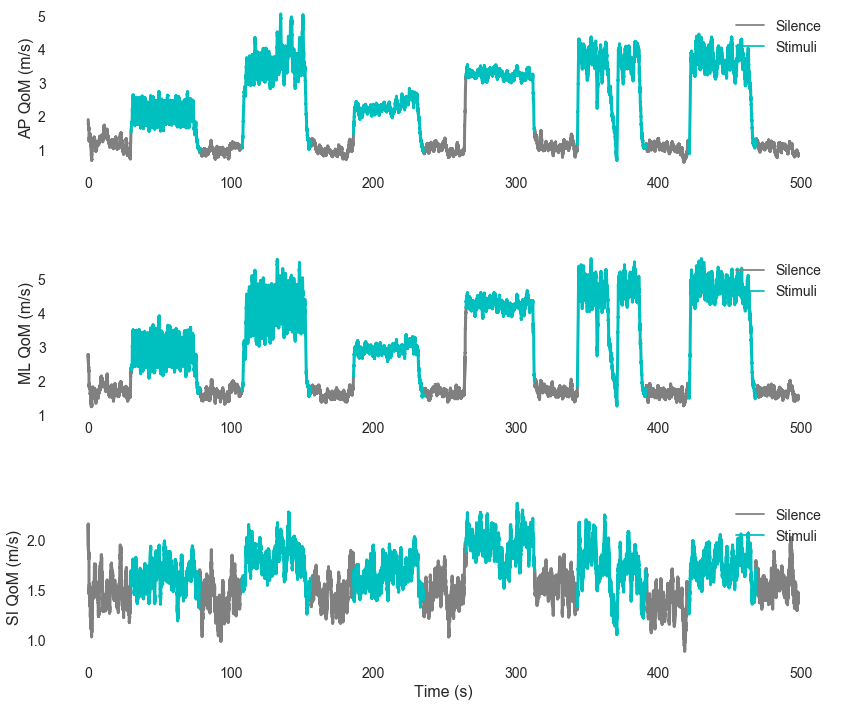

In [197]:
#Plotting segmented QoM in the three directions with color-coded conditions for one participant
f = plt.figure(figsize=(14,12))
hfont = {'fontname':'Helvetica'}


axX = plt.subplot(3, 1, 1)
axX.set_facecolor("white")
for i in range(0,7,1):
  axX.plot(QoMX_smooth_segmented_sil[2][i][2], 'gray', lw=3, label='_nolegend_') #plotting silence segments
for j in range(0,6,1):
  axX.plot(QoMX_smooth_segmented_mus[2][j][2], 'c', lw=3, label='_nolegend_') #plotting music segments
  
plt.plot([], label="Silence", color='gray')  
plt.plot([], label="Stimuli", color='c')
plt.tick_params(axis='both', which='major', labelsize=14)
plt.ylabel('AP QoM (mm/s)', fontsize=16);
plt.legend(loc='upper right', fontsize=14)


axZ = plt.subplot(3, 1, 2)
axZ.set_facecolor("white")
for i in range(0,7,1):
  axZ.plot(QoMY_smooth_segmented_sil[2][i][2], 'gray', lw=3, label='_nolegend_') #plotting silence segments
for j in range(0,6,1):
  axZ.plot(QoMY_smooth_segmented_mus[2][j][2], 'c', lw=3, label='_nolegend_') #plotting music segments
  
plt.plot([], label="Silence", color='gray')  
plt.plot([], label="Stimuli", color='c')
plt.tick_params(axis='both', which='major', labelsize=14)
plt.ylabel('ML QoM (mm/s)', fontsize=16);
plt.legend(loc='upper right', fontsize=14)


axY = plt.subplot(3, 1, 3)
axY.set_facecolor("white")
for i in range(0,7,1):
  axY.plot(QoMZ_smooth_segmented_sil[2][i][2], 'gray', lw=3, label='_nolegend_') #plotting silence segments
for j in range(0,6,1):
  axY.plot(QoMZ_smooth_segmented_mus[2][j][2], 'c', lw=3, label='_nolegend_') #plotting music segments
  
plt.plot([], label="Silence", color='gray')  
plt.plot([], label="Stimuli", color='c')
plt.tick_params(axis='both', which='major', labelsize=14)
plt.xlabel('Time (s)', fontsize=16);
plt.ylabel('SI QoM (mm/s)', fontsize=16);
plt.legend(loc='upper right', fontsize=14)


plt.subplots_adjust(hspace=0.5)



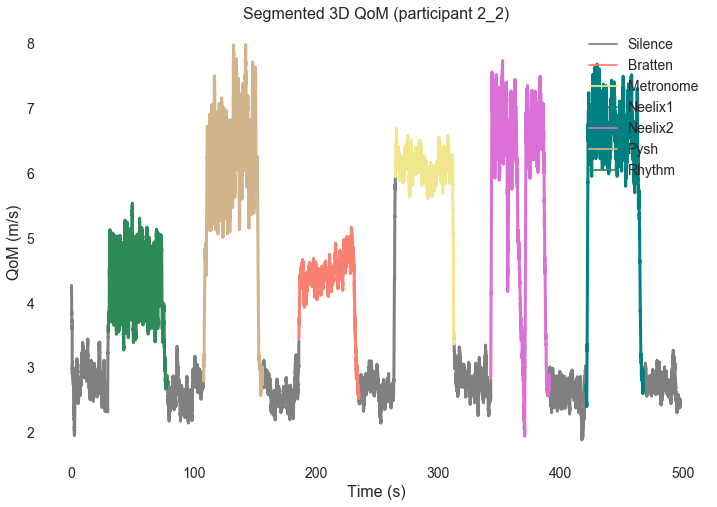

In [200]:
#Plotting segmented QoM (norm) with color-coded stimuli for one participant

fig8, ax8 = plt.subplots(1)
fig8.set_figheight(8)
fig8.set_figwidth(12)
ax8.set_facecolor("white")
for i in range(0,7,1):
  ax8.plot(QoM_smooth_segmented_sil[2][i][2], 'gray', lw=3, label='_nolegend_') #plotting silence segments

ax8.plot(QoM_smooth_segmented_sort_mus[2][1][2], 'salmon', lw=3, label='_nolegend_') #plotting stimuli
ax8.plot(QoM_smooth_segmented_sort_mus[2][2][2], 'khaki', lw=3, label='_nolegend_') #plotting stimuli
ax8.plot(QoM_smooth_segmented_sort_mus[2][3][2], 'teal', lw=3, label='_nolegend_') #plotting stimuli
ax8.plot(QoM_smooth_segmented_sort_mus[2][4][2], 'orchid', lw=3, label='_nolegend_') #plotting stimuli
ax8.plot(QoM_smooth_segmented_sort_mus[2][5][2], 'tan', lw=3, label='_nolegend_') #plotting stimuli
ax8.plot(QoM_smooth_segmented_sort_mus[2][6][2], 'seagreen', lw=3, label='_nolegend_') #plotting stimuli


plt.plot([], label="Silence", color='gray')

plt.plot([], label="Bratten", color='salmon')
plt.plot([], label="Metronome", color='khaki')
plt.plot([], label="Neelix1", color='teal')
plt.plot([], label="Neelix2", color='orchid')
plt.plot([], label="Pysh", color='tan')
plt.plot([], label="Rhythm", color='seagreen')

plt.tick_params(axis='both', which='major', labelsize=14)
plt.xlabel('Time (s)', fontsize=16);
plt.ylabel('QoM (mm/s)', fontsize=16);
plt.title('Segmented 3D QoM (participant 2_2)', fontsize=16)
plt.legend(loc='upper right', fontsize=14)

## Visualizing the stimuli

In [116]:
#Plotting segmented QoM (norm) with color-coded stimuli for one participant AND stimuli waveforms

#Loading stimuli files with librosa

y1, sr1 = librosa.load('path')
y2, sr2 = librosa.load('path')
y3, sr3 = librosa.load('path')
y4, sr4 = librosa.load('path')
y5, sr5 = librosa.load('path')
y6, sr6 = librosa.load('path')

fig = plt.figure(figsize=(16,12))
grid = plt.GridSpec(20, 7, wspace=0.5, hspace=0.5)


plt.subplot(grid[12:15,0:2])
librosa.display.waveplot(y4, sr=sr4, color='orchid')
plt.xlabel('Time (s)', fontsize=16);
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.ylim((-1,1))


plt.subplot(grid[12:15,2:4])
plt.title('Sound Stimuli waveforms', fontsize=16)
librosa.display.waveplot(y5, sr=sr5, color='tan')
plt.xlabel('Time (s)', fontsize=16);
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.ylim((-1,1))

plt.subplot(grid[12:15,4:6])
librosa.display.waveplot(y6, sr=sr6, color='seagreen')
plt.xlabel('Time (s)', fontsize=16);
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.ylim((-1,1))

plt.subplot(grid[16:19,0:2])
librosa.display.waveplot(y1, sr=sr1, color='salmon')
plt.xlabel('Time (s)', fontsize=16);
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.ylim((-1,1))


plt.subplot(grid[16:19,2:4])
librosa.display.waveplot(y2, sr=sr2, color='khaki')
plt.xlabel('Time (s)', fontsize=16);
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.ylim((-1,1))


plt.subplot(grid[16:19,4:6])
librosa.display.waveplot(y3, sr=sr3, color='teal')
plt.xlabel('Time (s)', fontsize=16);
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.ylim((-1,1))


ax8 = plt.subplot(grid[0:10,0:6])

for i in range(0,7,1):
  ax8.plot(QoMX_smooth_segmented_sil[5][i][2], 'gray', lw=3, label='_nolegend_') #plotting silence segments

ax8.plot(QoMX_smooth_segmented_sort_mus[5][1][2], 'salmon', lw=3, label='_nolegend_') #plotting stimuli
ax8.plot(QoMX_smooth_segmented_sort_mus[5][2][2], 'khaki', lw=3, label='_nolegend_') #plotting stimuli
ax8.plot(QoMX_smooth_segmented_sort_mus[5][3][2], 'teal', lw=3, label='_nolegend_') #plotting stimuli
ax8.plot(QoMX_smooth_segmented_sort_mus[5][4][2], 'orchid', lw=3, label='_nolegend_') #plotting stimuli
ax8.plot(QoMX_smooth_segmented_sort_mus[5][5][2], 'tan', lw=3, label='_nolegend_') #plotting stimuli
ax8.plot(QoMX_smooth_segmented_sort_mus[5][6][2], 'seagreen', lw=3, label='_nolegend_') #plotting stimuli

plt.plot([], label="Silence", color='gray')


plt.plot([], label="Bratten", color='orchid')
plt.plot([], label="Metronome", color='tan')
plt.plot([], label="Neelix1", color='seagreen')

plt.plot([], label=" ", color='white')

plt.plot([], label="Neelix2", color='salmon')
plt.plot([], label="Pysh", color='khaki')
plt.plot([], label="Rhythm", color='teal')


plt.tick_params(axis='both', which='major', labelsize=14)
plt.xlabel('Time (s)', fontsize=16);
plt.ylabel('QoM (mm/s)', fontsize=16);
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

plt.title('Segmented AP QoM (participant 5_2)', fontsize=16)
#plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', fontsize=16)
plt.legend(loc='upper left', fontsize=14, ncol=2)
plt.tight_layout()
fig.savefig("segmentsqom_stimuli.pdf", bbox_inches='tight')


NameError: name 'librosa' is not defined

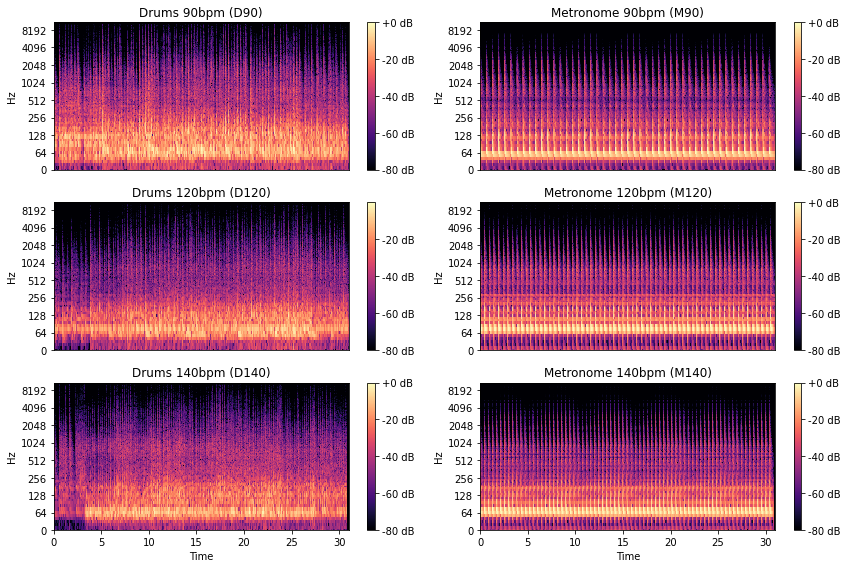

In [ ]:
#Generating spectrograms for all stimuli

D1 = librosa.amplitude_to_db(np.abs(librosa.stft(y1)), ref=np.max)
D2 = librosa.amplitude_to_db(np.abs(librosa.stft(y2)), ref=np.max)
D3 = librosa.amplitude_to_db(np.abs(librosa.stft(y3)), ref=np.max)
D4 = librosa.amplitude_to_db(np.abs(librosa.stft(y4)), ref=np.max)
D5 = librosa.amplitude_to_db(np.abs(librosa.stft(y5)), ref=np.max)
D6 = librosa.amplitude_to_db(np.abs(librosa.stft(y6)), ref=np.max)

fig = plt.figure(figsize=(12,8))

plt.subplot(3, 2, 1)
librosa.display.specshow(D1, y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Bratten')

plt.subplot(3, 2, 3)
librosa.display.specshow(D2, y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Metronome')

plt.subplot(3, 2, 5)
librosa.display.specshow(D3, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Neelix1')

plt.subplot(3, 2, 2)
librosa.display.specshow(D4, y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Neelix1')

plt.subplot(3, 2, 4)
librosa.display.specshow(D5, y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Pysh')

plt.subplot(3, 2, 6)
librosa.display.specshow(D6, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Rhythm')

plt.tight_layout()

fig.savefig("spectrograms_stimuli.pdf", bbox_inches='tight')
